## 課題3-1 回答例

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
rng= np.random.default_rng();

In [3]:
#データ 例：指数分布(母平均beta=1)
pop_mean=1.0
beta=pop_mean
N=10 # sample size
x= rng.exponential(scale=beta, size=N); # 観測データ 

In [4]:
B=50000
rbs= np.empty(B)
for i_bs in range(0,B):
    xbs= rng.choice(x, size=N, replace=True) # BS sample of x
    rbs[i_bs]= np.mean(xbs) # BS sample of R (この例では統計量Rは標本平均としている)

In [5]:
rbs= np.sort(rbs)
alpha=0.05
L=int(alpha/2*B)
U=int((1-alpha/2)*B)
R_expect_l= rbs[L]
R_expect_u= rbs[U]
print(R_expect_l,R_expect_u) # Bootstrap Percentile 法の区間推定結果

0.46946518961390904 2.086232570539578


### 比較参考：正規母集団を仮定した解析的な区間推定

In [6]:
tau_l= stats.t.ppf(q=alpha/2, df=N-1) # t分布の下側境界
tau_u= stats.t.ppf(q=1-alpha/2, df=N-1) # t分布の上側境界
# 信頼水準alphaの母平均の区間推定
x_popmean_low= np.mean(x)-tau_u*np.sqrt(np.var(x,ddof=1)/N)
x_popmean_up= np.mean(x)-tau_l*np.sqrt(np.var(x,ddof=1)/N)
print(x_popmean_low, x_popmean_up)

0.16122674191520336 2.1614568379440593


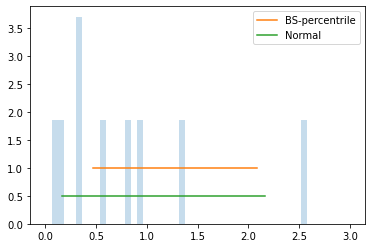

In [7]:
plt.hist(x, bins=50, range=(0,3*beta), density=True, alpha=0.25)
plt.plot([R_expect_l,R_expect_u],[1,1],label="BS-percentrile")
plt.plot([x_popmean_low,x_popmean_up],[0.5,0.5],label="Normal")
plt.legend(loc='upper right')